In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install torchmetrics
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.2/840.2 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.0 MB/s eta 0:00:00


In [2]:
%%writefile model.py
import torch.nn as nn
import torch.nn.functional as F


class CnnNet(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


class BasicBlock(nn.Module):
    expansion = 1
    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_planes, planes, stride=1):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, self.expansion*planes, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(self.expansion*planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.relu(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64
        self.num_features = num_classes

        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


def ResNet18():
    return ResNet(BasicBlock, [2,2,2,2])

def ResNet34():
    return ResNet(BasicBlock, [3,4,6,3])

def ResNet50():
    return ResNet(Bottleneck, [3,4,6,3])

def ResNet101():
    return ResNet(Bottleneck, [3,4,23,3])

def ResNet152():
    return ResNet(Bottleneck, [3,8,36,3])


#def test():
#    net = ResNet18()
#    y = net(torch.randn(1,3,32,32))
#    print(y.size())

Writing model.py


In [6]:
import torch
_ = torch.manual_seed(123)
from torchmetrics.image.inception import InceptionScore
from torchvision.io import read_image, ImageReadMode
from pathlib import Path
from model import ResNet18

ModuleNotFoundError: No module named 'model'

In [ ]:
model_dir = '/content/drive/MyDrive/Models/mnist_model_10.ckpt'
feat_ex = ResNet18()
feat_ex.load_state_dict(torch.load(model_dir))
feat_ex.num_features=10

# Inception Score

In [ ]:
inception = InceptionScore(normalize=False, feature=feat_ex)

path = Path('/content/drive/MyDrive/Models/Samples/control_images')

images = []
for file in path.glob("*.png"):
    img = read_image(f"{file}", mode=ImageReadMode.GRAY)
    images.append(img)

imgs = torch.stack(images).to(torch.float32)
inception.update(imgs)
inception.compute()

/usr/local/lib/python3.10/dist-packages/torchmetrics/utilities/prints.py:43: UserWarning: Metric `InceptionScore` will save all extracted features in buffer. For large datasets this may lead to large memory footprint.
  warnings.warn(*args, **kwargs)  # noqa: B028


(tensor(5.9459), tensor(1.1504))

In [ ]:
inception = InceptionScore(normalize=False, feature=feat_ex)

path = Path('/content/drive/MyDrive/Models/Samples/homogenous_images')

images = []
for file in path.glob("*.png"):
    img = read_image(f"{file}", mode=ImageReadMode.GRAY)
    images.append(img)

imgs = torch.stack(images).to(torch.float32)
inception.update(imgs)
inception.compute()

(tensor(3.6795), tensor(1.0987))

In [ ]:
inception = InceptionScore(normalize=False, feature=feat_ex)

path = Path('/content/drive/MyDrive/Models/Samples/10_model_mix')

images = []
for file in path.glob("*.png"):
    img = read_image(f"{file}", mode=ImageReadMode.GRAY)
    images.append(img)

imgs = torch.stack(images).to(torch.float32)
inception.update(imgs)
inception.compute()

(tensor(3.1651), tensor(0.8203))

# FID

In [5]:
from torchmetrics.image.fid import FrechetInceptionDistance
from datasets import load_dataset, Dataset
from torchvision.transforms import Compose, ToTensor, Lambda, ToPILImage, CenterCrop, Resize
from torchvision import transforms
import numpy as np

In [ ]:
data = load_dataset("mnist")

In [ ]:
transform = Compose([
            transforms.ToTensor(),
])

tensors = [transform(image.convert("L")) for image in data["train"]["image"]]

In [ ]:
images = {
    i:[] for i in range(10)
}
for ex in data["train"]:
    images[ex["label"]].append(ex["image"])

gt_imgs = []

for k, v in images.items():
    images[k] = np.array(v)
    np.random.shuffle(images[k])
    gt_imgs.extend(images[k][:60].tolist())



# frac = len(tensors) // 100

# tensors = tensors[:frac]
len(gt_imgs)

tensors = [transform(image.convert("L")) for image in gt_imgs]

<ipython-input-65-9088f4cd98ba>:10: FutureWarning: The input object of type 'PngImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'PngImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  images[k] = np.array(v)
<ipython-input-65-9088f4cd98ba>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images[k] = np.array(v)


In [ ]:
gt_imgs = torch.stack(tensors)
gt_imgs.shape

torch.Size([600, 1, 28, 28])

In [ ]:
hasattr(feat_ex, "num_features")

True

In [ ]:
fid = FrechetInceptionDistance(normalize=False, feature=feat_ex)
fid.update(gt_imgs, real=True)

path = Path('/content/drive/MyDrive/Models/Samples/control_images')

images = []
for file in path.glob("*.png"):
    img = read_image(f"{file}", mode=ImageReadMode.GRAY)
    images.append(img)

imgs = torch.stack(images).to(torch.float32)
fid.update(imgs, real=False)
fid.compute()

tensor(1.6274)

In [ ]:
fid = FrechetInceptionDistance(normalize=False, feature=feat_ex)
fid.update(gt_imgs, real=True)

path = Path('/content/drive/MyDrive/Models/Samples/homogenous_images')

images = []
for file in path.glob("*.png"):
    img = read_image(f"{file}", mode=ImageReadMode.GRAY)
    images.append(img)

imgs = torch.stack(images).to(torch.float32)
fid.update(imgs, real=False)
fid.compute()

tensor(31.7551)

In [ ]:
fid = FrechetInceptionDistance(normalize=False, feature=feat_ex)
fid.update(gt_imgs, real=True)

path = Path('/content/drive/MyDrive/Models/Samples/10_model_mix')

images = []
for file in path.glob("*.png"):
    img = read_image(f"{file}", mode=ImageReadMode.GRAY)
    images.append(img)

imgs = torch.stack(images).to(torch.float32)
fid.update(imgs, real=False)
fid.compute()

tensor(37.1922)

# Qualatative Analysis

In [11]:
import torch
from torchvision.utils import make_grid, save_image
from torchvision.io import read_image
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
from pathlib import Path
import numpy as np

In [12]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(1 - np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

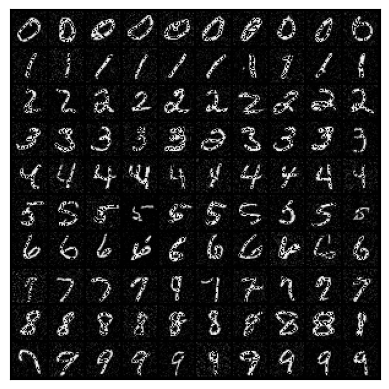

In [13]:
path = Path('/content/drive/MyDrive/Models/Samples/control_images')

images = []
for file in path.glob("*.png"):
    img = read_image(f"{file}")
    images.append(img)

imgs = torch.stack(images).to(torch.float32)

grid = make_grid(imgs, nrow=10)

save_image(grid, '/content/drive/MyDrive/Models/control_imgs_grid.png')
show(grid)

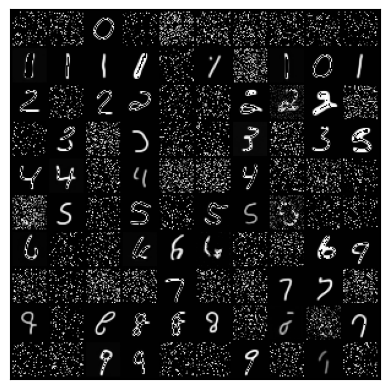

In [14]:
path = Path('/content/drive/MyDrive/Models/Samples/homogenous_images')

images = []
for file in path.glob("*.png"):
    img = read_image(f"{file}")
    images.append(img)

imgs = torch.stack(images).to(torch.float32)

grid = make_grid(imgs, nrow=10)

save_image(grid, '/content/drive/MyDrive/Models/homogenous_imgs_grid.png')
show(grid)

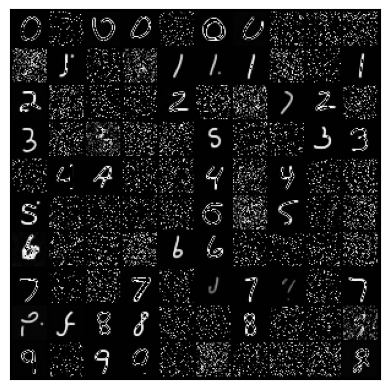

In [15]:
path = Path('/content/drive/MyDrive/Models/Samples/10_model_mix')

images = []
for file in path.glob("*.png"):
    img = read_image(f"{file}")
    images.append(img)

imgs = torch.stack(images).to(torch.float32)

grid = make_grid(imgs, nrow=10)

save_image(grid, '/content/drive/MyDrive/Models/heterogeneous_imgs_grid.png')
show(grid)